<a href="https://colab.research.google.com/github/snmahsa/Classification/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
#Import database
xl_file = pd.ExcelFile('/content/drive/MyDrive/Bank Loan Modeling/Bank_Personal_Loan_Modelling.xlsx')
print(xl_file.sheet_names)
data = pd.read_excel(xl_file, sheet_name='Data')

['Description', 'Data']


In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


🌕 This project, we aim to develop a classifier for identifying potential customers who are more likely to purchase a personal loan using the Thera-Bank dataset. Thera-Bank is interested in expanding their loan business by converting liability customers into retail loan customers, while keeping them as depositors. The retail marketing department is developing campaigns with better target marketing to increase the success rate with a minimal budget.



*   **ID** : The first column of this dataset is "ID" which represents the customer ID.

*   **Age** :The "Age" column shows the age of each customer in completed years.

*   **Experience** :Experience" column represents the amount of work experience in years for each customer.

*   **Income** :"Income" column shows the amount of annual income (in thousands) for each customer.

*   **Zipcode**:The "Zipcode" column represents the postal code in which each customer lives.

*   **Family**:"Family" column shows the number of family members for each customer.



*   **CCAvg** :The "CCAvg" column represents the average monthly spending with the credit card (in thousands) for each customer.


*   **Education** :"Education" column shows the education level of each customer, with 1 representing a bachelor's degree, 2 representing a master's degree, and 3 representing an advanced/professional degree.


*   **Mortgage** :The "Mortgage" column represents the value of home mortgage (in thousands) for each customer, if any.


*   **Securities Account** :"Securities Account" column indicates whether the customer has a securities account with the bank or not.


*   **CD Account** :The "CD Account" column represents whether the customer has a certificate of deposit account (CD) with the bank or not.


*   **Online** :"Online" column shows whether the customer uses the bank's internet banking facilities or not.

*   **CreditCard** :The "CreditCard" column indicates whether the customer uses a credit card issued by the bank or not.



*   **Personal Loan** :Finally, the "Personal Loan" column represents whether the customer accepted the personal loan offered in the last campaign or not, which is the target variable in this dataset.







🌕 The data set includes 5000 observations with fourteen variables divided into four different measurement categories.
###**The binary category** :

 the target variable personal loan,

  also securities account,

   CD account,

   online banking and

   credit card.


###**The interval category** :

   age,

   experience,

   income,

   CC avg,

   mortgage.

###**The ordinal category**:

   family

   education.

###**nominal** :

   with ID

   and Zip code.

   The variable ID does not add any interesting information e.g. individual association between a person (indicated by ID) and loan does not provide any general conclusion for future potential loan customers. Therefore, it will be neglected in the examination.

#Get some information

In [ ]:
cat_Features = ['CD Account','Education','Family','Securities Account','Online','CreditCard']
target = 'Personal Loan'

In [ ]:
binary_category =['Securities Account','CD Account','Online','CreditCard']
ordinal_category=['Family','Education']
interval_category =['Age','Experience','Income','CCAvg','Mortgage']
nominal = ['ID','ZIP Code']


In [ ]:
#Dimensions
data.shape

(5000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#finding unique data for each column
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

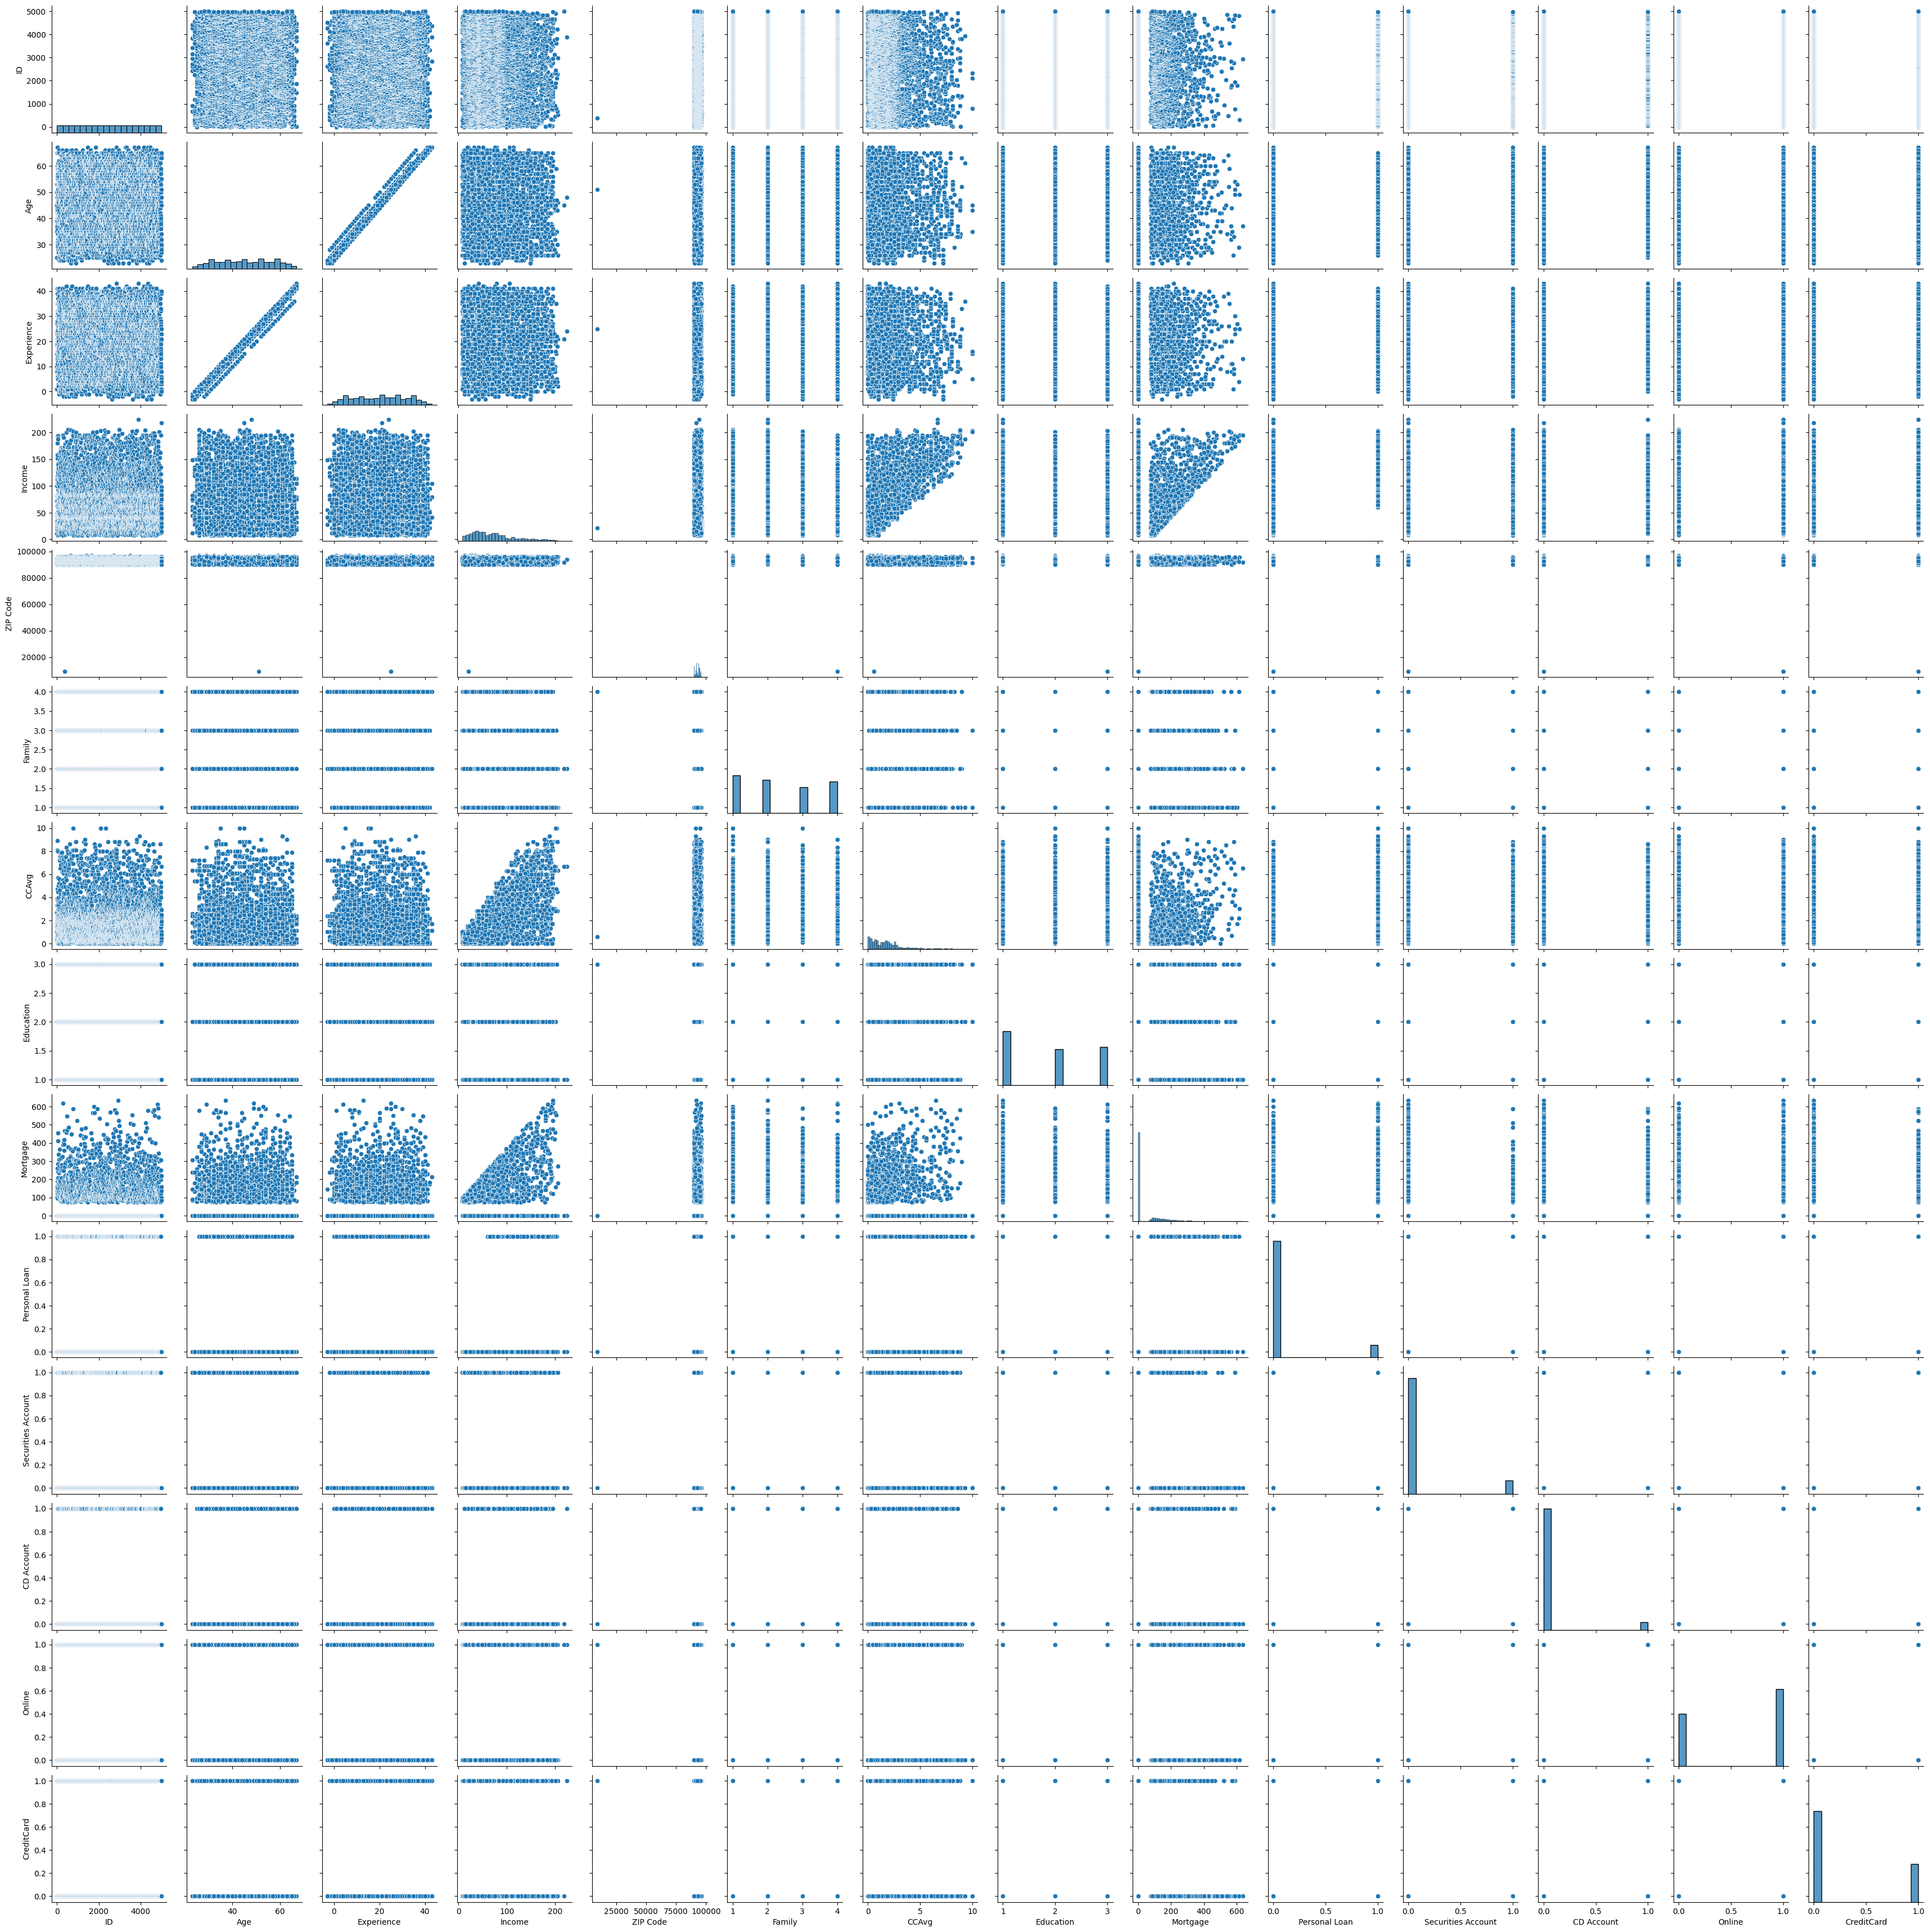

In [ ]:
sns.pairplot(data)

In [ ]:
#Number of customers
personal_loan_counts = data["Personal Loan"].value_counts()
print(f"Number of customers with Personal Loan:\n{personal_loan_counts[1]}")
print(f"Number of customers without Personal Loan:\n{personal_loan_counts[0]}")

Number of customers with Personal Loan:
480
Number of customers without Personal Loan:
4520


#Preprocessing


In [ ]:
#'Exprience' has negative value
data['Experience'] = abs(data['Experience'])

In [ ]:
#check duplicated rows
data.duplicated().sum()

0

✅ the dataset does not contain any duplicated values



---



---


📔 If the correlation coefficient between two variables is greater than 0.7, it is considered as a strong correlation. If the correlation coefficient between two variables is between 0.3 and 0.7, it is considered as a moderate correlation. If the correlation coefficient between two variables is less than 0.3, it is considered as a weak correlation.

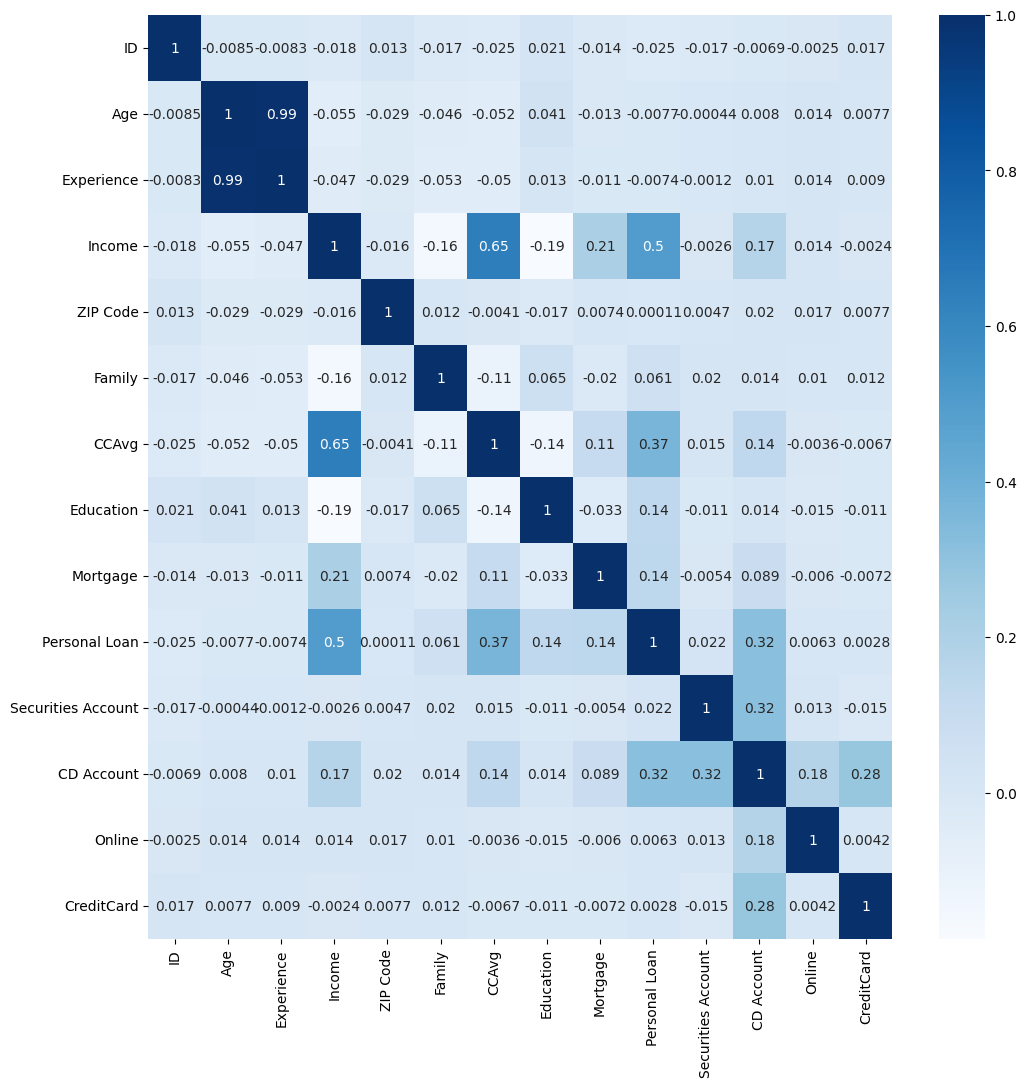

In [ ]:
#heatmap
fig = plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),cmap='Blues',annot =True)
plt.show()

✅ **Target is** : Personal Lonan

this col has Moderate correlation Income, CD_Account, CCAvg with Personal Loan



---



---


📔
**There are different methods to identify outliers in the data. Some of these methods are:**

1. Boxplot diagram: This method is used in the analysis of continuous data, and outliers can be identified by analyzing certain areas of the Boxplot diagram.

2. Cook's method: In this method, by calculating the average and standard deviation of the data, the permissible range for the data is determined, and then the data that are outside this range are known as outliers.

3. standard deviation method: In this method, data that are more than 3 standard deviations away from the average data are known as outliers.
Boxplot diagram: This method is used in the analysis of continuous data, and by analyzing certain areas of the Boxplot diagram, outliers can be identified.

4. The method of the smallest and largest data: In this method, the value of the smallest and largest data is calculated, and then the data that are outside this range are known as outliers.



column name : ID


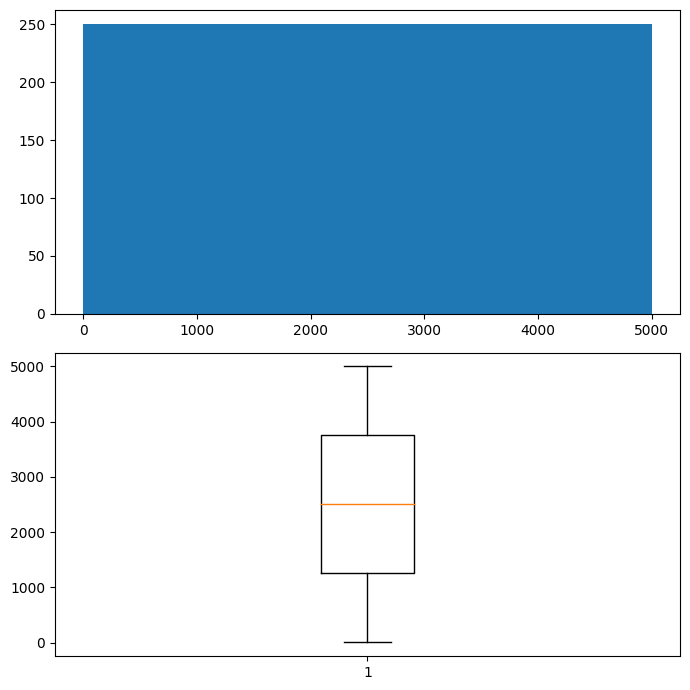

column name : Age


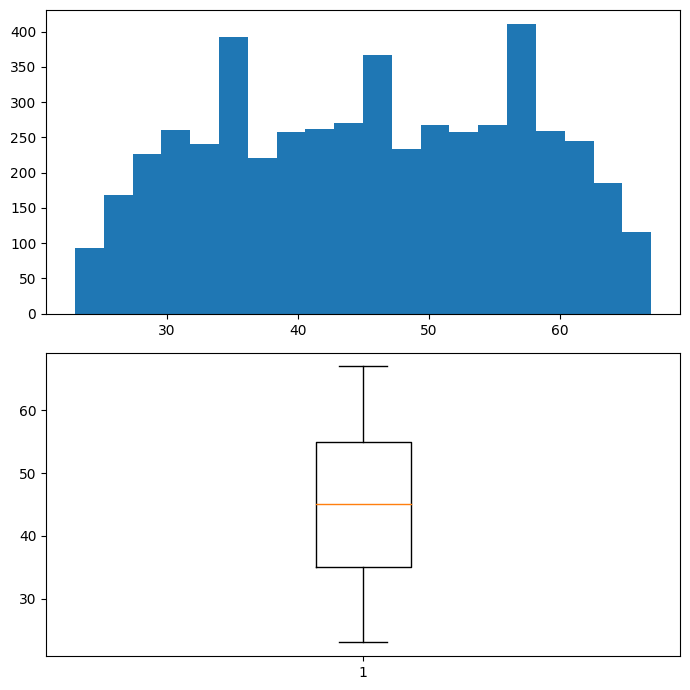

column name : Experience


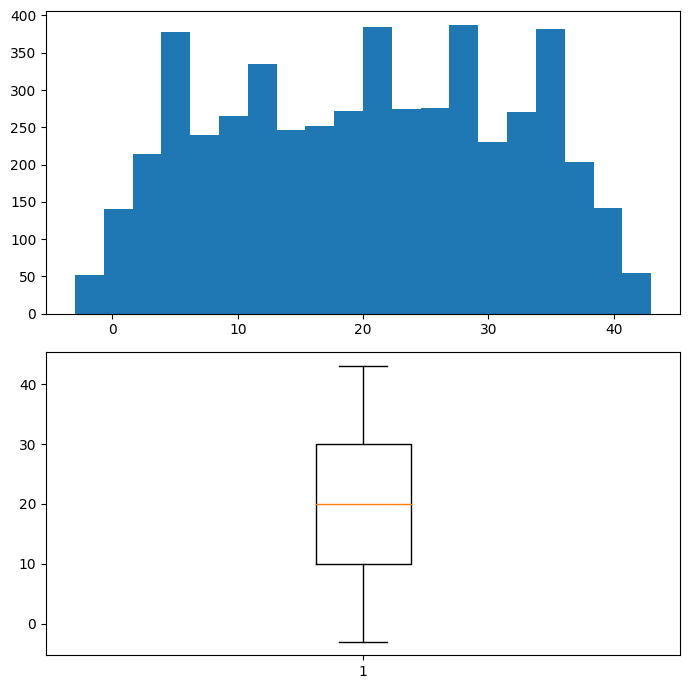

column name : Income


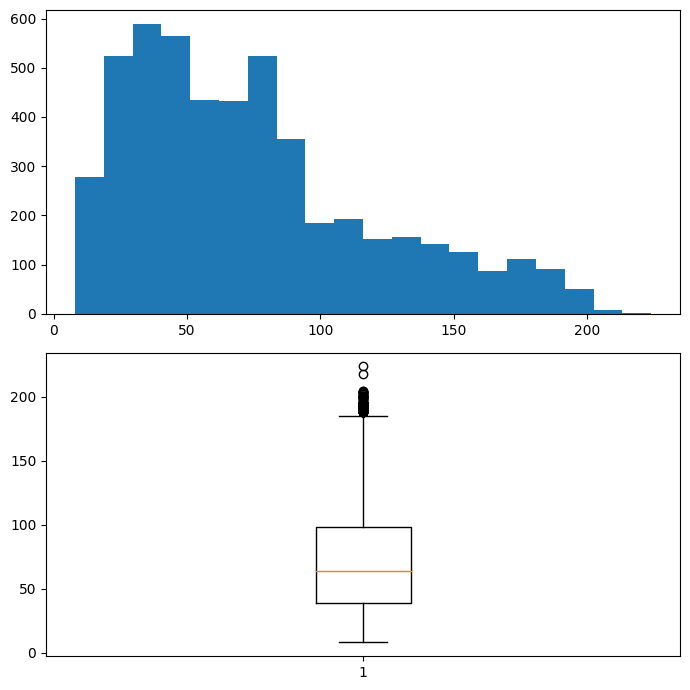

column name : ZIP Code


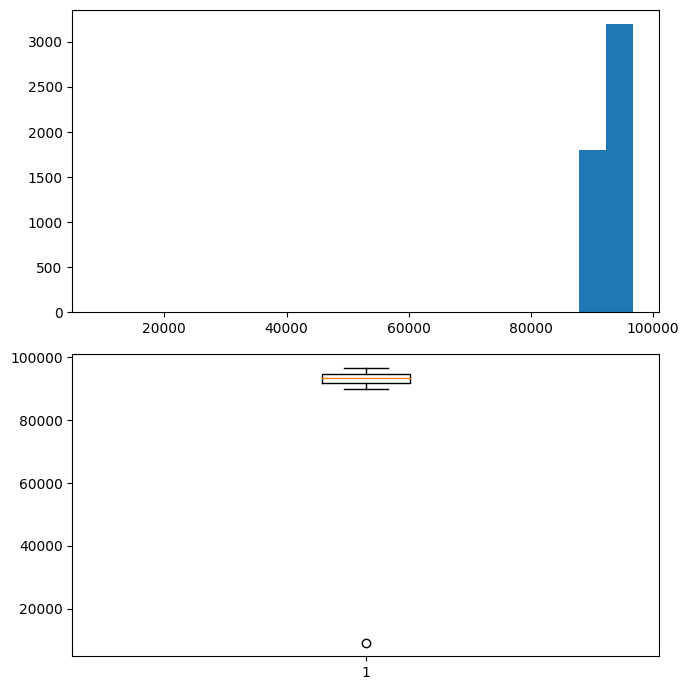

column name : Family


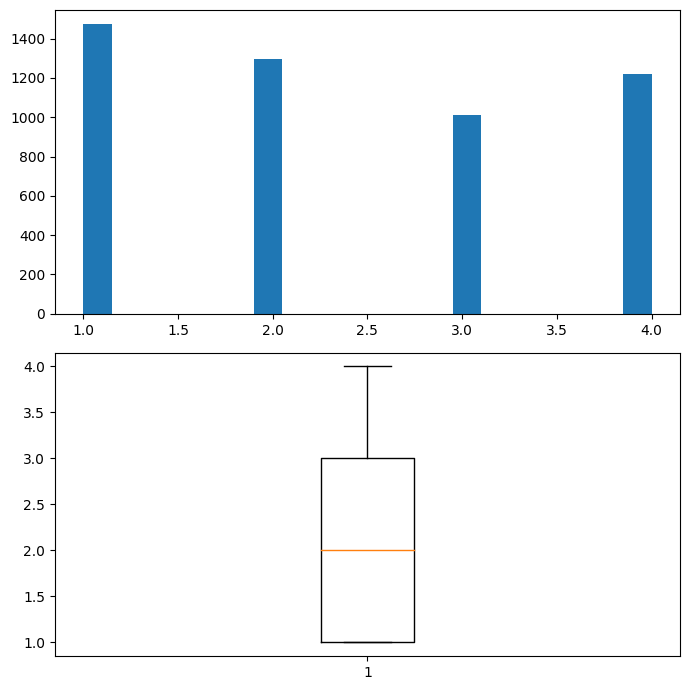

column name : CCAvg


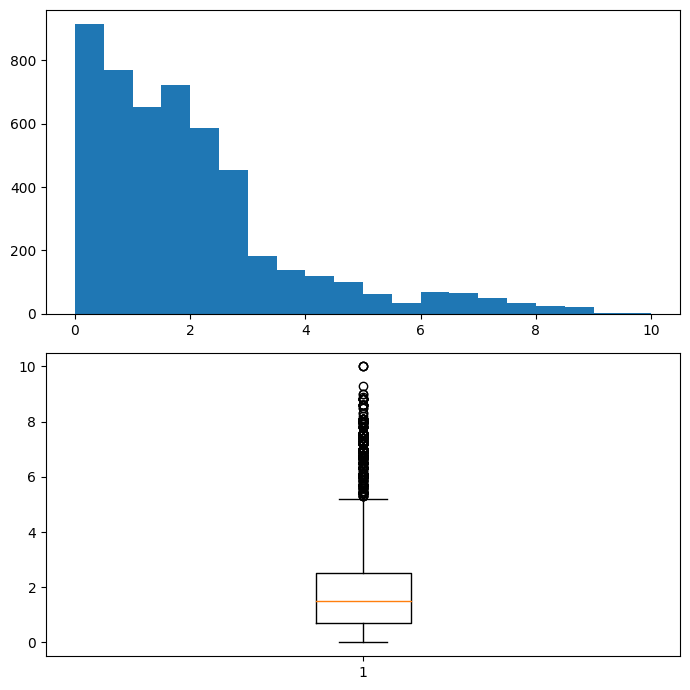

column name : Education


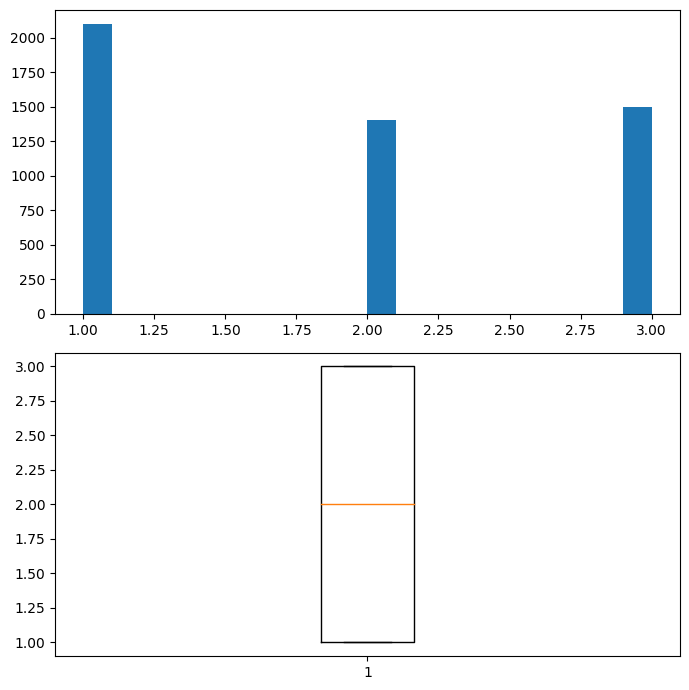

column name : Mortgage


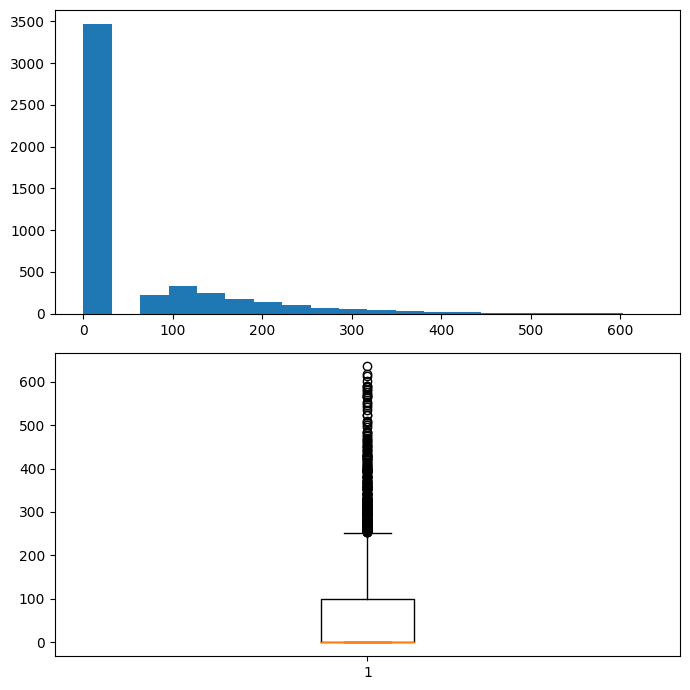

column name : Personal Loan


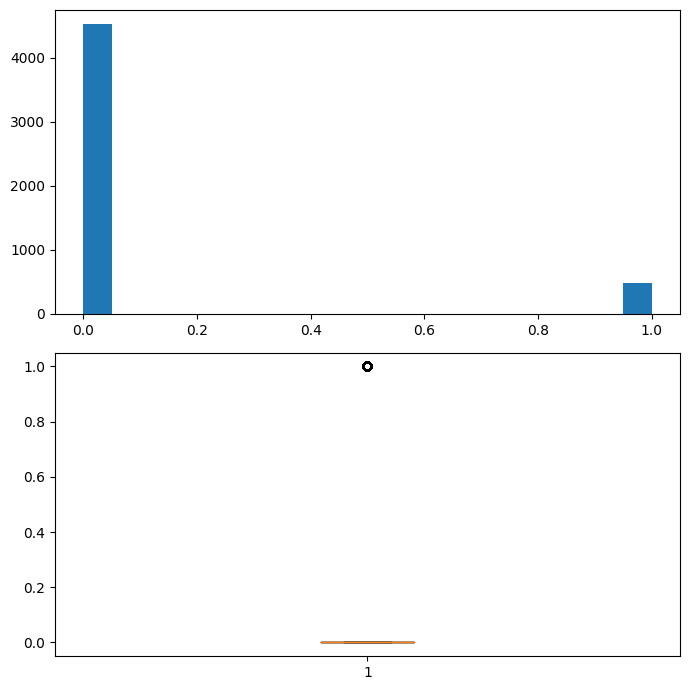

column name : Securities Account


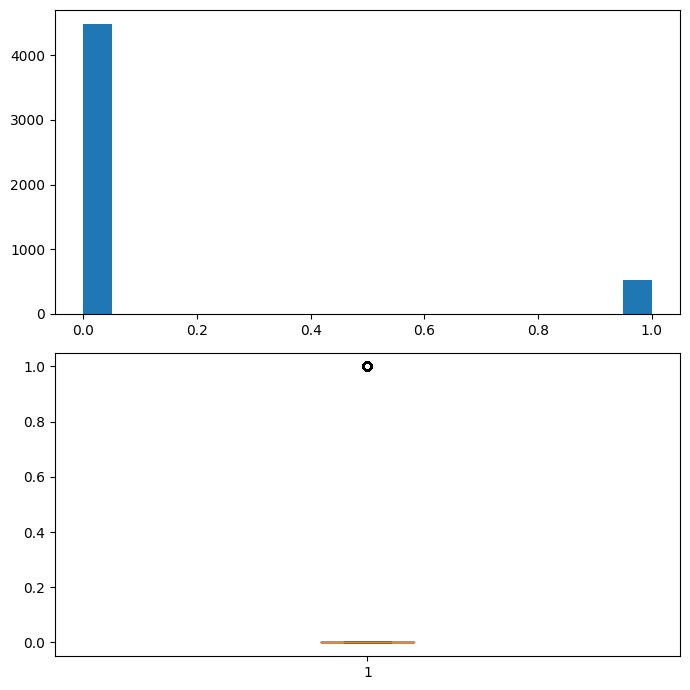

column name : CD Account


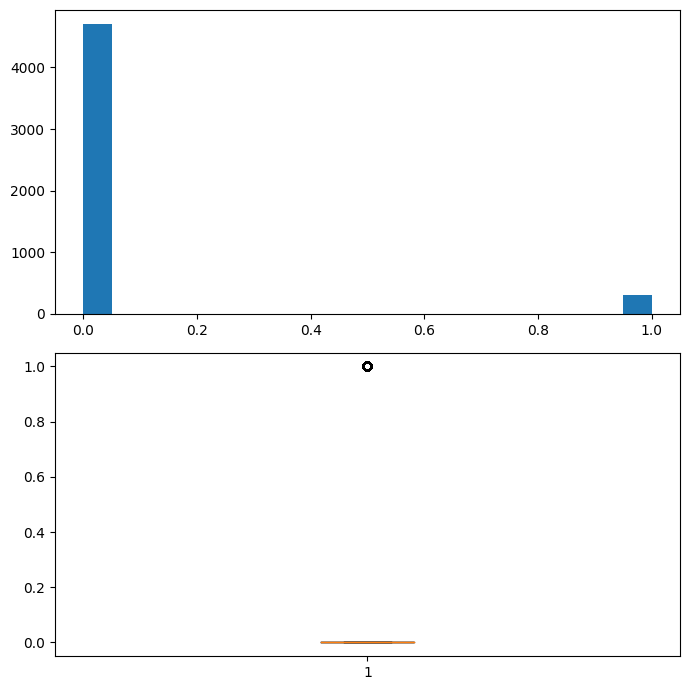

column name : Online


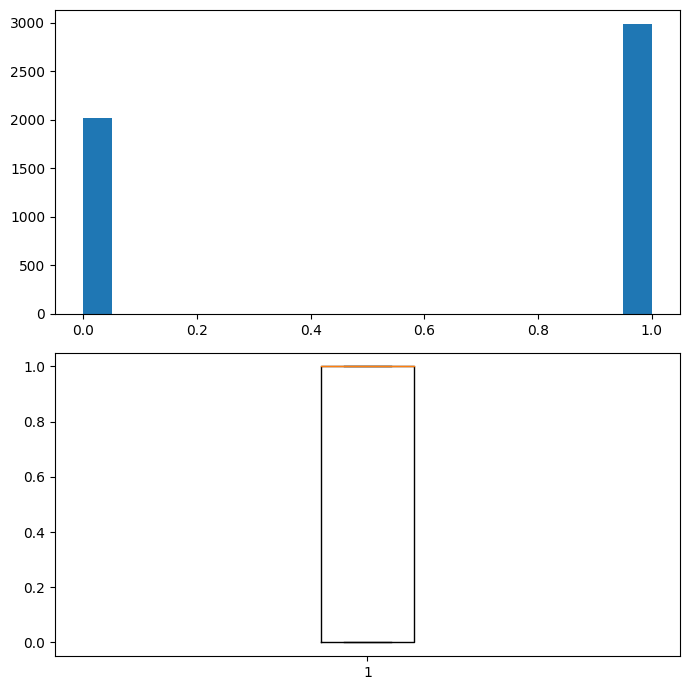

column name : CreditCard


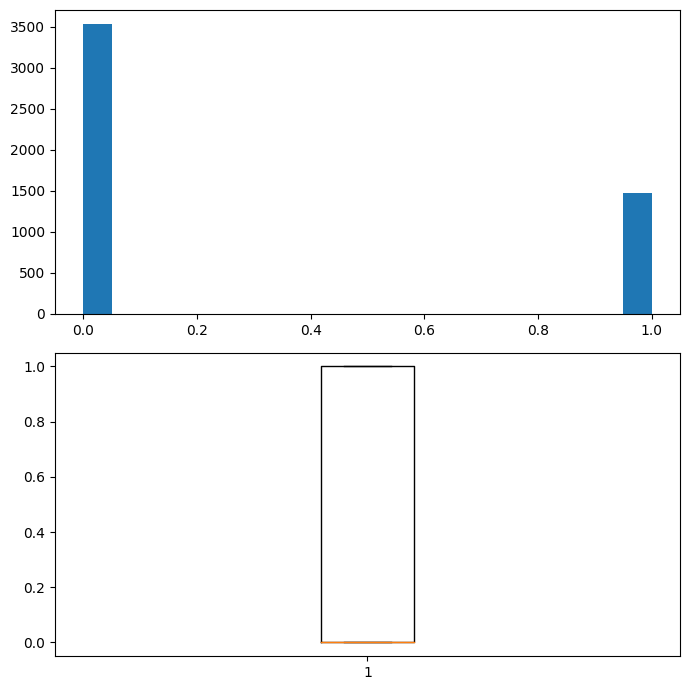

In [ ]:
#histogram and boxplot for each columns
for col in data.columns:
    fig, axs = plt.subplots(nrows=2, figsize=(7,7))
    print("column name :",col)
    axs[0].hist(data[col], bins=20)
    axs[1].boxplot(data[col])
    plt.tight_layout()
    plt.show()

✅ That seems Mortgage and CCAvg have outlier






---



---



In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Convert intervel data to normalized categories using StandardScaler Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])


scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])

# concat scaled columns to df
df = pd.concat([df[['ID', 'ZIP Code', 'Family',
       'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']], scaled_df], axis=1)

In [ ]:
df

,ID,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage
0,1,91107,4,1,0,1,0,0,0,-1.774417,-1.666078,-0.538229,-0.193371,-0.555524
1,2,90089,3,1,0,1,0,0,0,-0.029524,-0.096330,-0.864109,-0.250595,-0.555524
2,3,94720,1,1,0,0,0,0,0,-0.552992,-0.445163,-1.363793,-0.536720,-0.555524
3,4,94112,1,2,0,0,0,0,0,-0.901970,-0.968413,0.569765,0.436103,-0.555524
4,5,91330,4,2,0,0,0,0,1,-0.901970,-1.055621,-0.625130,-0.536720,-0.555524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,92697,1,3,0,0,0,1,0,-1.425438,-1.491662,-0.733757,-0.021696,-0.555524
4996,4997,92037,4,1,0,0,0,1,0,-1.338194,-1.404454,-1.276892,-0.880069,0.280238
4997,4998,93023,2,3,0,0,0,0,0,1.540880,1.647835,-1.081363,-0.937294,-0.555524
4998,4999,90034,3,2,0,0,0,1,0,1.715370,1.735043,-0.538229,-0.822844,-0.555524


In [ ]:
# # Removing outlier data using the Z-score Scaling method
# from scipy import stats
# z_scores = stats.zscore(scaled_data)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# data_cleaned = data[filtered_entries]

In [ ]:
#Treatment of outliers
from scipy import stats
for col in ['Mortgage','CCAvg']:
  # Calculate the mean and standard deviation of the data
  mean = df[col].mean()
  std = df[col].std()

  # Determining the threshold
  threshold = 3

  # Identifying outliers using z-score
  z_scores = (df[col] - mean) / std
  outliers = z_scores[abs(z_scores) > threshold].index
  print(f"number of outlier in {col} is :{df[stats.zscore(df[col])>3][col].count()}")
  # # Remove outliers
  df = df.drop(outliers)
  df.reset_index(drop=True, inplace=True)

df

number of outlier in Mortgage is :105
number of outlier in CCAvg is :107


,ID,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage
0,1,91107,4,1,0,1,0,0,0,-1.774417,-1.666078,-0.538229,-0.193371,-0.555524
1,2,90089,3,1,0,1,0,0,0,-0.029524,-0.096330,-0.864109,-0.250595,-0.555524
2,3,94720,1,1,0,0,0,0,0,-0.552992,-0.445163,-1.363793,-0.536720,-0.555524
3,4,94112,1,2,0,0,0,0,0,-0.901970,-0.968413,0.569765,0.436103,-0.555524
4,5,91330,4,2,0,0,0,0,1,-0.901970,-1.055621,-0.625130,-0.536720,-0.555524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,4996,92697,1,3,0,0,0,1,0,-1.425438,-1.491662,-0.733757,-0.021696,-0.555524
4784,4997,92037,4,1,0,0,0,1,0,-1.338194,-1.404454,-1.276892,-0.880069,0.280238
4785,4998,93023,2,3,0,0,0,0,0,1.540880,1.647835,-1.081363,-0.937294,-0.555524
4786,4999,90034,3,2,0,0,0,1,0,1.715370,1.735043,-0.538229,-0.822844,-0.555524




---



---



In [ ]:
df.columns

Index(['ID', 'ZIP Code', 'Family', 'Education', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Age',
       'Experience', 'Income', 'CCAvg', 'Mortgage'],
      dtype='object')

In [ ]:
# # Data dimensionality reduction using PCA
# from sklearn.decomposition import PCA
# df =df[['Family', 'Education', 'Personal Loan',
#        'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Age',
#        'Experience', 'Income', 'CCAvg', 'Mortgage']]
# pca = PCA(n_components=2)
# data_pca = pca.fit_transform(df)



---



---



**Attribute conversion**

✅In this data set, CCAVG represents the average monthly credit card cost, but revenue represents the amount of annual revenue. To equalize the units of characteristics, we get the amount of monthly income

In [ ]:
df['Income'] = df['Income']/12



---



---



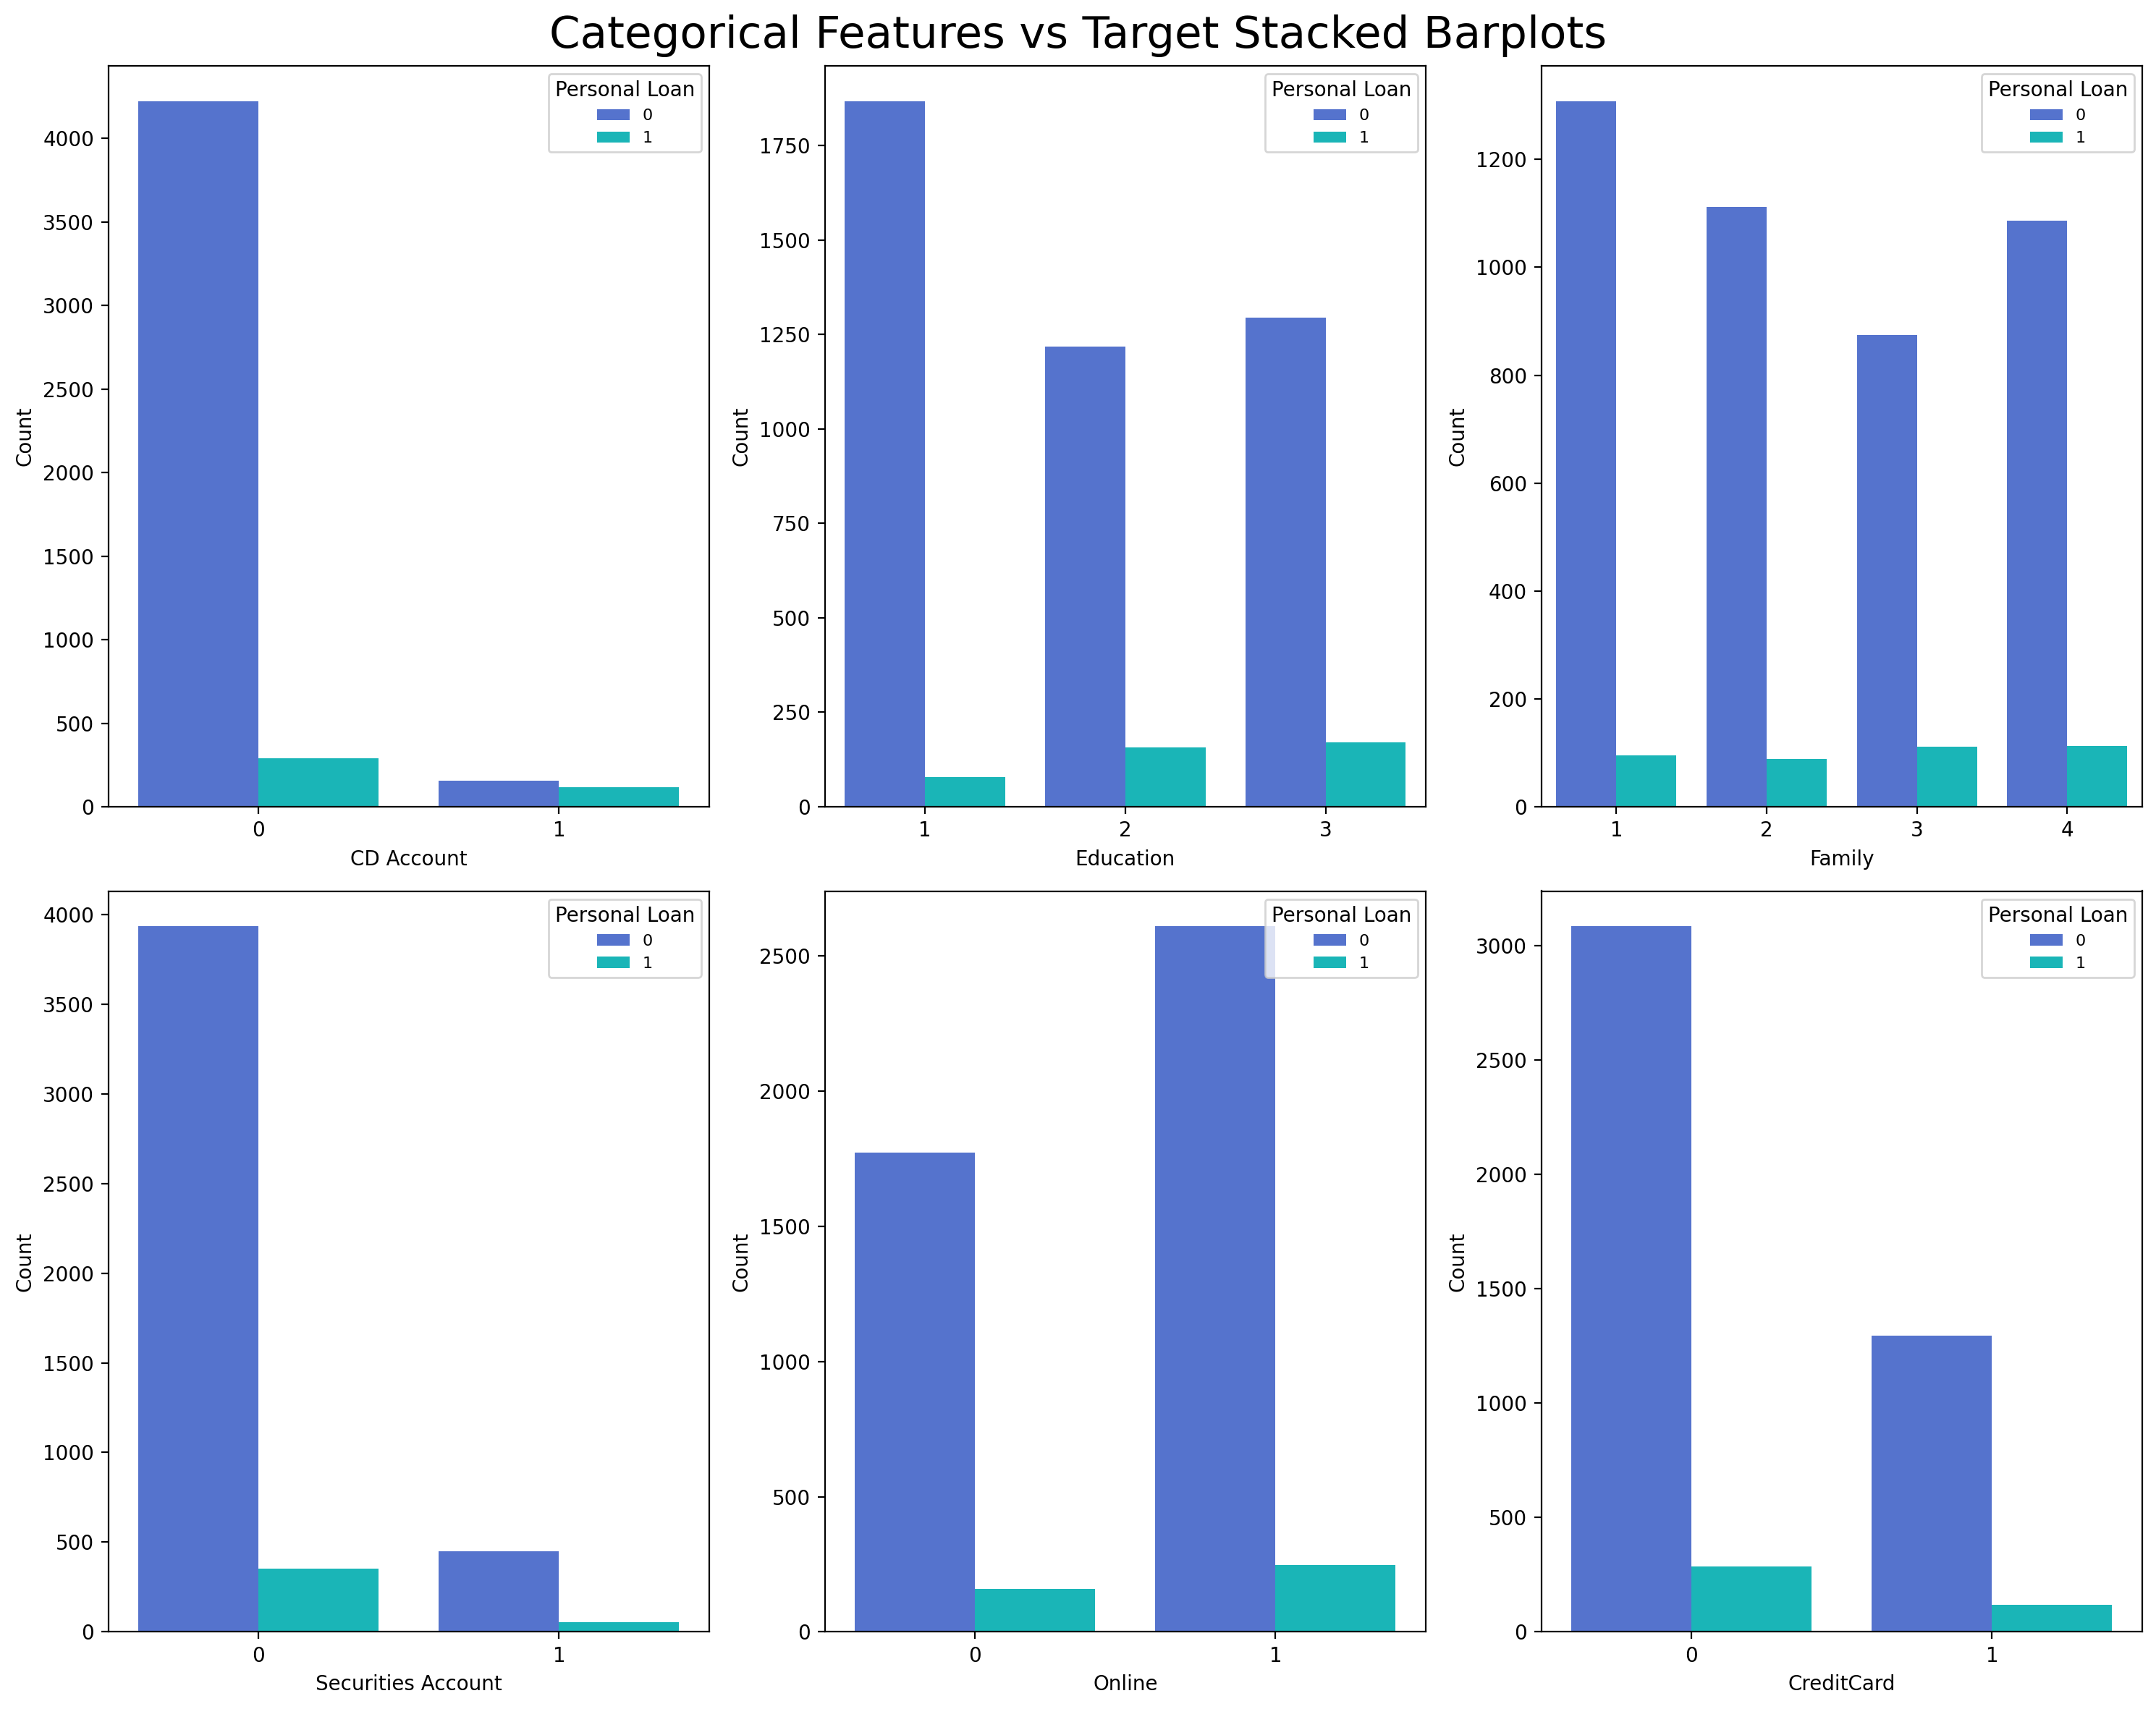

In [ ]:
#plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for ax, col in zip(axes.flatten(), cat_Features):
    sns.countplot(x=col, data=df, hue=target, ax=ax, palette=['royalblue', 'darkturquoise'])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Personal Loan', loc='upper right', fontsize=8)

fig.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
fig.tight_layout()
plt.show()

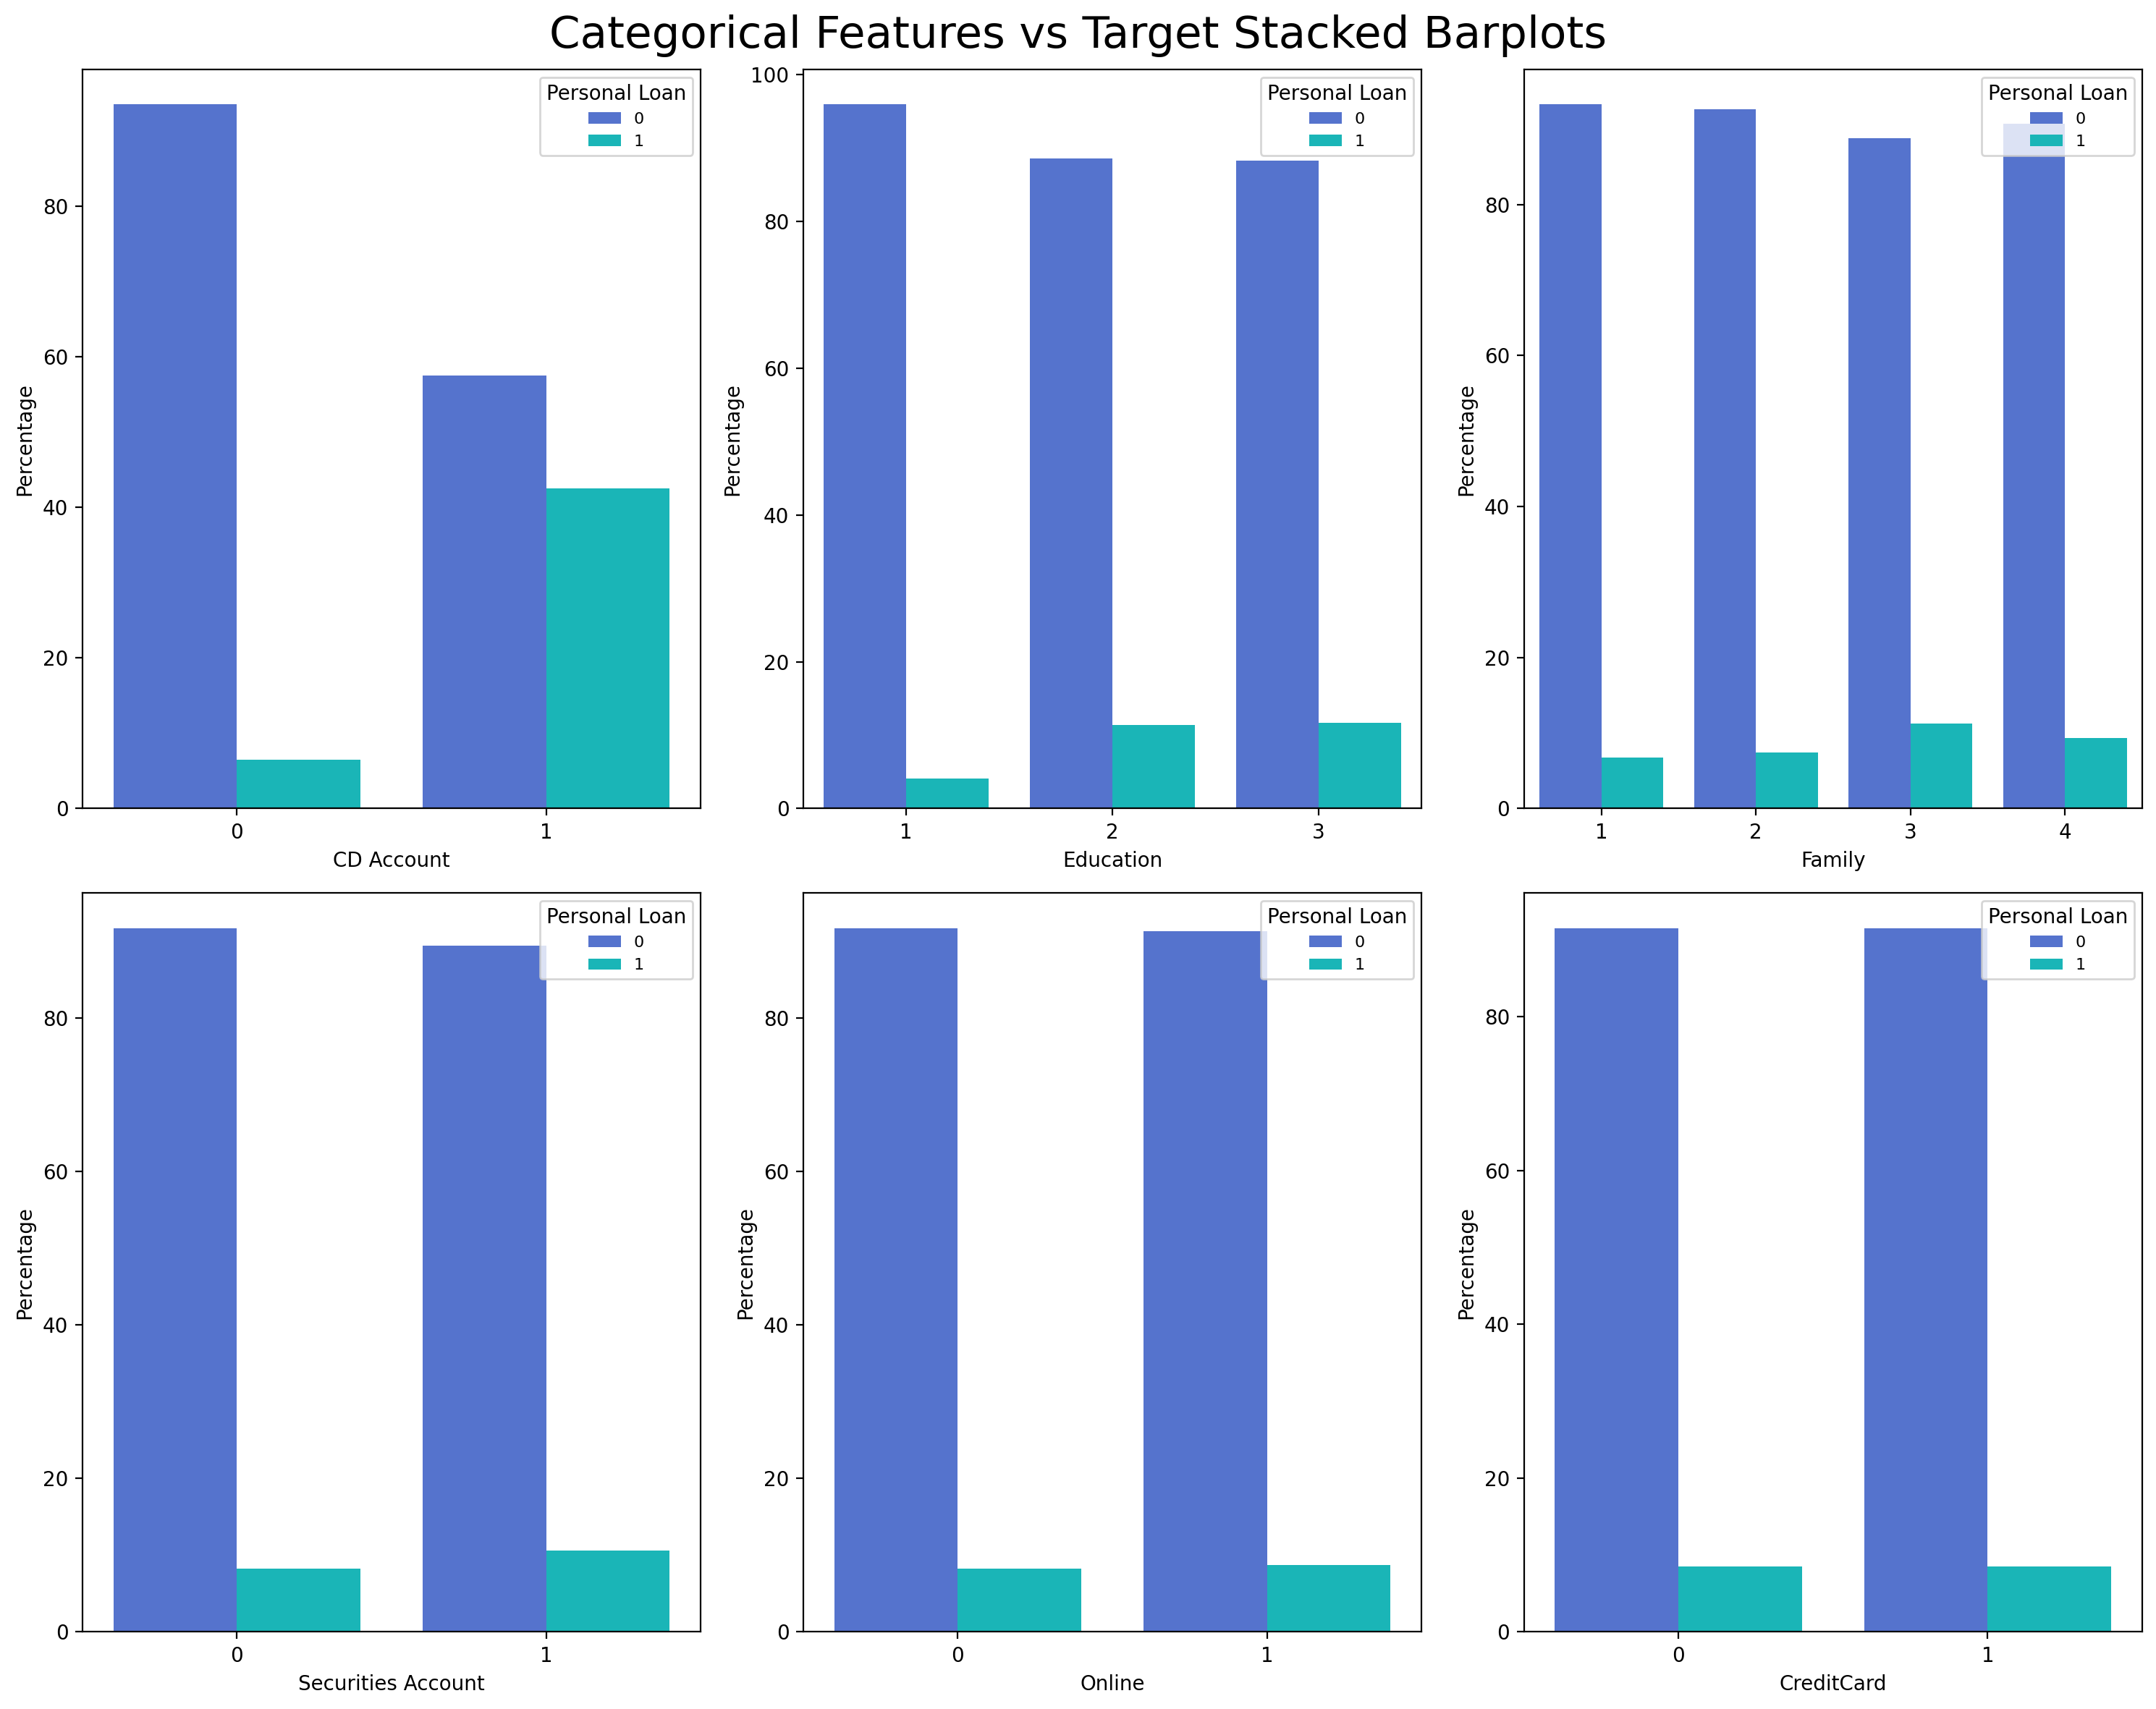

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for ax, col in zip(axes.flatten(), cat_Features):
    # Calculate the percentage of each category for each target class
    df_cat = df.groupby([col, target]).size().reset_index(name='count')
    df_total = df.groupby([col]).size().reset_index(name='total_count')
    df_cat = df_cat.merge(df_total, on=col)
    df_cat['percentage'] = df_cat['count'] / df_cat['total_count'] * 100

    # Plot the stacked barplot
    sns.barplot(x=col, y='percentage', data=df_cat, hue=target, ax=ax, palette=['royalblue', 'darkturquoise'])
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.legend(title='Personal Loan', loc='upper right', fontsize=8)

fig.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
fig.tight_layout()
plt.show()

✅It seems that the customer with a certificate of deposit (CD) with the bank is buying a personal loan from the bank.

✅ It seems that the level of education has little effect on the willingness to buy a personal loan.

✅ The number of family members does not have a special effect on buying a personal loan.

✅ Having a securities bank account does not affect the possibility of buying a personal loan.

✅A customer using or not using internet banking does not seem to have any effect on the likelihood of purchasing a personal loan.

✅This does not affect the possibility of buying a personal loan.



---



---



In [ ]:
#

✅

✅

✅

✅

✅

#**Model**

In [ ]:
# Separate the independent attributes and store them in X array
# Store the target column into Y array

X = df.drop(['ID','ZIP Code','Personal Loan',], axis=1)
y = df.loc[:, df.columns == 'Personal Loan']

X_array = X.values
y_array = y.values

In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=0.2, random_state=7)

In [ ]:
 # to convert 1 d vector into 1 d array
y_train = np.ravel(y_train)



---



📔`GaussianNB()` is a machine learning algorithm from the Naive Bayes family that is used for classification problems. This algorithm responds to data based on the normal (or Gaussian) distribution.

To use `GaussianNB()`, first the training data is fed into the algorithm and it is used to train the model. Then, using the trained model, we can make predictions for new data on which class they belong to.

In the `GaussianNB()` algorithm, each data point is input as a vector of continuous variables and the algorithm looks for its own parameters of normal distribution. Then, using these parameters, the algorithm probabilistically predicts which class the given data belongs to.

Overall, `GaussianNB()` is a simple and fast algorithm for classification problems in continuous data that can be useful for high-volume data problems.

In [ ]:
#Creat model
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)


In [ ]:
accuracy = model.score(X_test, y_test)
accuracy

0.9196242171189979

In [ ]:
# summarize the fit of the model

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       877
           1       0.52      0.72      0.60        81

    accuracy                           0.92       958
   macro avg       0.75      0.83      0.78       958
weighted avg       0.93      0.92      0.93       958



📔

In [ ]:
#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

[[817  60]
 [ 24  57]]




---



---


📔

`BernoulliNB()` is a machine learning algorithm from the Naive Bayes family that is used for classification problems. This algorithm responds to data based on the Bernoulli distribution.

To use this algorithm, first the training data is fed into the algorithm and it is used to train the model. Then, using the trained model, we can make predictions for new data on which class they belong to.

In the `BernoulliNB()` algorithm, each data point is input as a vector of binary variables (i.e., variables whose values are only 0 or 1) and the algorithm automatically looks for its own Bernoulli parameters. Then, using these parameters, the algorithm probabilistically predicts which class the given data belongs to.

Overall, `BernoulliNB()` is a simple and fast algorithm for binary data classification problems that can be useful for high-volume data problems.

📔

`GaussianNB()` and `BernoulliNB()` are both machine learning algorithms from the Naive Bayes family that are used for classification problems, but they are used for different types of data.

`BernoulliNB()` is used for binary data, meaning the data consists of variables that can only take on the values of 0 and 1. This algorithm is commonly used for text and image classification tasks.

`GaussianNB()` is used for continuous data, meaning the data consists of variables that can take on any integer or even decimal value. This algorithm is commonly used for classification tasks involving numerical variables.

In both algorithms, the training data is first fed into the algorithm and a model is built to predict the class of new data. In `BernoulliNB()`, each data point is input as a vector of binary variables, while in `GaussianNB()`, each data point is input as a vector of continuous variables. Based on the type of data, different algorithms are used to predict the class of new data.

In [ ]:
df.columns

Index(['ID', 'ZIP Code', 'Family', 'Education', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Age',
       'Experience', 'Income', 'CCAvg', 'Mortgage'],
      dtype='object')



---



---



In [ ]:
#binary and interval , binary columns
X1 = df[['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Age',
       'Experience', 'Income', 'CCAvg', 'Mortgage']]
X1_array = X1.values

y1 = df.loc[:, df.columns == 'Personal Loan']
y1_array = y1.values

In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1_array, y1_array, test_size=0.2, random_state=7)

In [ ]:
 # to convert 1 d vector into 1 d array
y_train1 = np.ravel(y_train1)

In [ ]:
#Creat model
model1 = GaussianNB()
model1.fit(X_train1, y_train1)

predictions1=model1.predict(X_test1)


In [ ]:
accuracy1 = model1.score(X_test1, y_test1)
accuracy1

0.9029227557411273

In [ ]:
# summarize the fit of the model

print(metrics.classification_report(y_test1, predictions1))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       877
           1       0.45      0.72      0.56        81

    accuracy                           0.90       958
   macro avg       0.71      0.82      0.75       958
weighted avg       0.93      0.90      0.91       958





---



---

